In [132]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [133]:
def build_nn_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation=tf.nn.sigmoid))
    model.add(tf.keras.layers.Dense(128, activation=tf.nn.sigmoid))
    model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [134]:
    BATCH_SIZE = 10000
    NUM_EPOCHS = 10
    N_TEST = 10

In [135]:
if __name__ == "__main__":
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    x_train = tf.keras.utils.normalize(x_train, axis=1)
    x_test = tf.keras.utils.normalize(x_test, axis=1)

In [136]:
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255

(60000, 28, 28)


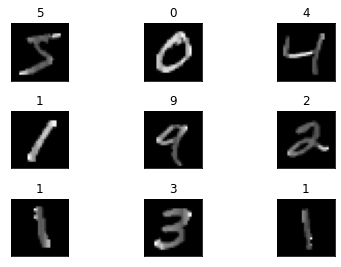

In [137]:
    print(x_train.shape)
    fig = plt.figure()
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.tight_layout()
        plt.imshow(x_train[i], cmap='gray')
        plt.title(y_train[i])
        plt.xticks([])
        plt.yticks([])
    
    plt.show()

In [138]:
    # NN
    new_model = build_nn_model()
    new_model.fit(x_train, y_train, epochs=NUM_EPOCHS, validation_split=0.1)
    val_loss, val_acc = new_model.evaluate(x_test, y_test)
    print(val_loss, val_acc)

Epoch 1/10
1688/1688 [==============================] - 3s 2ms/step - loss: 2.2970 - accuracy: 0.1259 - val_loss: 2.2341 - val_accuracy: 0.3470
Epoch 2/10
1688/1688 [==============================] - 3s 2ms/step - loss: 1.7967 - accuracy: 0.4136 - val_loss: 1.2691 - val_accuracy: 0.6100
Epoch 3/10
1688/1688 [==============================] - 3s 2ms/step - loss: 1.0817 - accuracy: 0.6412 - val_loss: 0.8439 - val_accuracy: 0.7297
Epoch 4/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.8333 - accuracy: 0.7209 - val_loss: 0.7099 - val_accuracy: 0.7647
Epoch 5/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.7276 - accuracy: 0.7617 - val_loss: 0.6062 - val_accuracy: 0.8132
Epoch 6/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.6590 - accuracy: 0.7890 - val_loss: 0.5693 - val_accuracy: 0.8258
Epoch 7/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.6069 - accuracy: 0.8104 - val_loss: 0.5281 - val_accuracy:

In [139]:
    predictions = new_model.predict(x_test)

    for i in range(N_TEST):
        y_pred = np.argmax(predictions[i])
        y_true = y_test[i]
        print("Element", i, ": [Value, Predicted] = [", y_true, ',', y_pred, '] - ', y_true == y_pred)

Element 0 : [Value, Predicted] = [ 7 , 7 ] -  True
Element 1 : [Value, Predicted] = [ 2 , 2 ] -  True
Element 2 : [Value, Predicted] = [ 1 , 1 ] -  True
Element 3 : [Value, Predicted] = [ 0 , 0 ] -  True
Element 4 : [Value, Predicted] = [ 4 , 4 ] -  True
Element 5 : [Value, Predicted] = [ 1 , 1 ] -  True
Element 6 : [Value, Predicted] = [ 4 , 4 ] -  True
Element 7 : [Value, Predicted] = [ 9 , 9 ] -  True
Element 8 : [Value, Predicted] = [ 5 , 4 ] -  False
Element 9 : [Value, Predicted] = [ 9 , 9 ] -  True


0


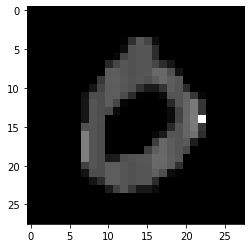

In [140]:
    fig = plt.figure()
    plt.imshow(x_test[3], cmap='gray', interpolation='none')
    print(np.argmax(predictions[3]))
    plt.show()